In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


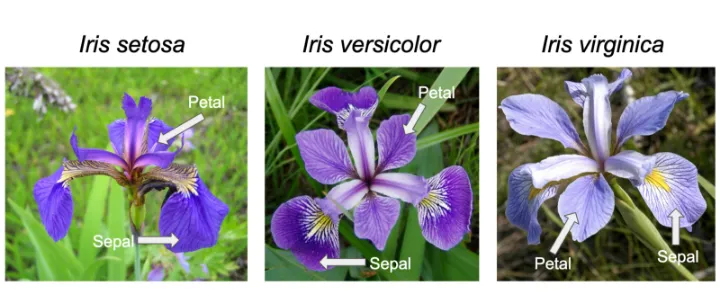

In [3]:

# 1. بارگذاری دیتاست Iris
iris = load_iris()



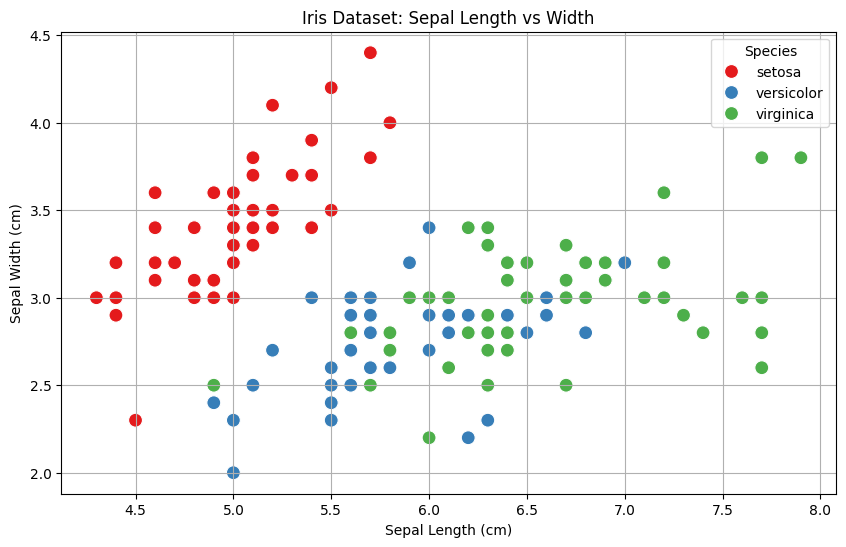

In [28]:



# Create a DataFrame from the data
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the species label to the DataFrame
iris_df['species'] = iris.target

# Map species numeric codes to names
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='species', palette='Set1', s=100)

# Customize the plot
plt.title('Iris Dataset: Sepal Length vs Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.grid()

# Show the plot
plt.show()

In [12]:
X = iris.data  # ویژگی‌ها


In [13]:
y = iris.target  # برچسب‌ها
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:


# 2. تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

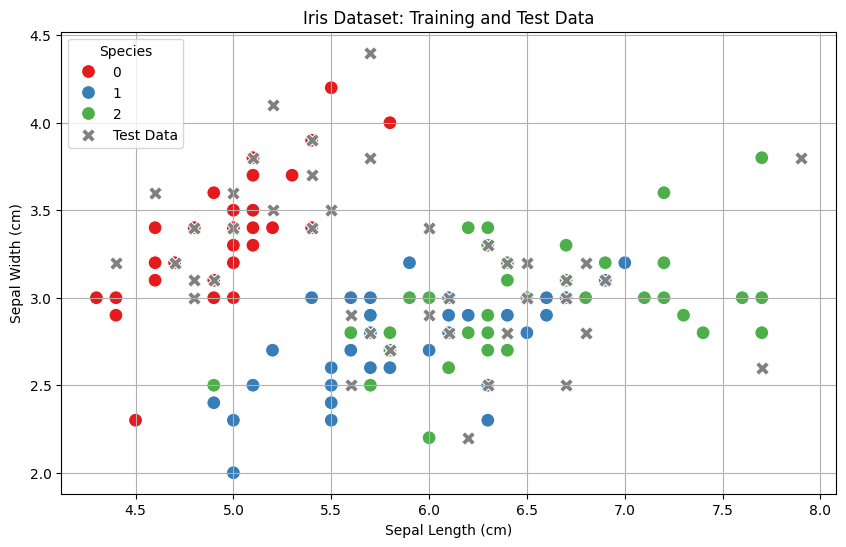

In [30]:

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create DataFrames for train and test sets
train_df = pd.DataFrame(X_train, columns=iris.feature_names)
train_df['species'] = y_train

test_df = pd.DataFrame(X_test, columns=iris.feature_names)
test_df['species'] = y_test

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot training data without a label (let seaborn manage hues)
sns.scatterplot(data=train_df, x='sepal length (cm)', y='sepal width (cm)', hue='species', palette='Set1', s=100)

# Plot test data in gray
sns.scatterplot(data=test_df, x='sepal length (cm)', y='sepal width (cm)', color='gray', s=100, marker='X', label='Test Data')

# Customize the plot
plt.title('Iris Dataset: Training and Test Data')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species', loc='upper left')  # Optionally manage legends manually
plt.grid()

# Show the plot
plt.show()

In [15]:

# 3. نرمال‌سازی داده‌ها (مقیاس‌بندی ویژگی‌ها)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# 4. آزمایش مدل KNN با مقادیر مختلف K
# ابتدا KNN را با K=3 پیاده‌سازی می‌کنیم
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
from sklearn.metrics import accuracy_score


# پیش‌بینی و ارزیابی مدل
y_pred = knn.predict(X_test_scaled)
print("دقت با K=3:", accuracy_score(y_test, y_pred))


دقت با K=3: 1.0


In [20]:
# 5. انتخاب بهترین مقدار K با استفاده از Cross-Validation
k_values = range(1, 21)  # بررسی K از 1 تا 20
mean_accuracies = []

In [ ]:
k_values

In [21]:
from sklearn.model_selection import cross_val_score
import numpy as np
# ارزیابی Cross-Validation برای هر K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    mean_accuracies.append(np.mean(cv_scores))



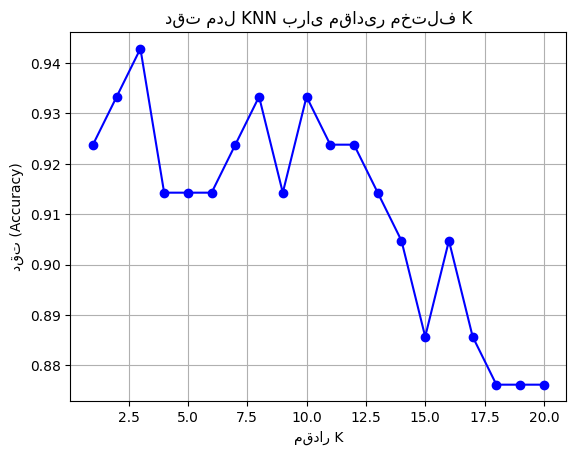

In [22]:
# رسم نمودار دقت مدل برای K‌های مختلف
plt.plot(k_values, mean_accuracies, marker='o', linestyle='-', color='b')
plt.title("دقت مدل KNN برای مقادیر مختلف K")
plt.xlabel("مقدار K")
plt.ylabel("دقت (Accuracy)")
plt.grid(True)
plt.show()


In [23]:
# انتخاب بهترین K بر اساس دقت متوسط
best_k = k_values[np.argmax(mean_accuracies)]
print(f"بهترین مقدار K: {best_k}")

# 6. آزمایش مدل با بهترین K
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)


بهترین مقدار K: 3


KNeighborsClassifier(n_neighbors=3)

In [24]:

# پیش‌بینی با مدل جدید
y_pred_best = knn_best.predict(X_test_scaled)
print(f"\nنتایج ارزیابی مدل با K={best_k}:")
print("دقت:", accuracy_score(y_test, y_pred_best))



نتایج ارزیابی مدل با K=3:
دقت: 1.0


In [26]:
from sklearn.metrics import classification_report

print("\nگزارش طبقه‌بندی:")
print(classification_report(y_test, y_pred_best))





گزارش طبقه‌بندی:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



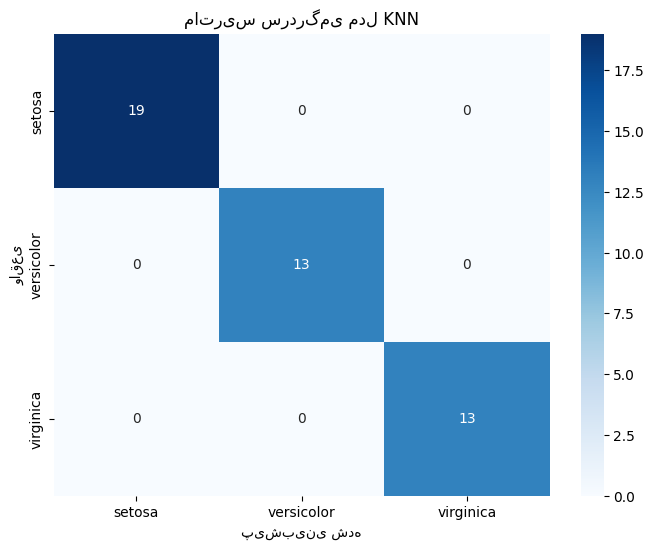

In [27]:
cm = confusion_matrix(y_test, y_pred)

# 6. نمایش ماتریس سردرگمی به صورت نمودار حرارتی (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('ماتریس سردرگمی مدل KNN')
plt.xlabel('پیش‌بینی شده')
plt.ylabel('واقعی')
plt.show()